In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dadosLimpos = pd.read_csv('../Data/dados_limpos.csv')

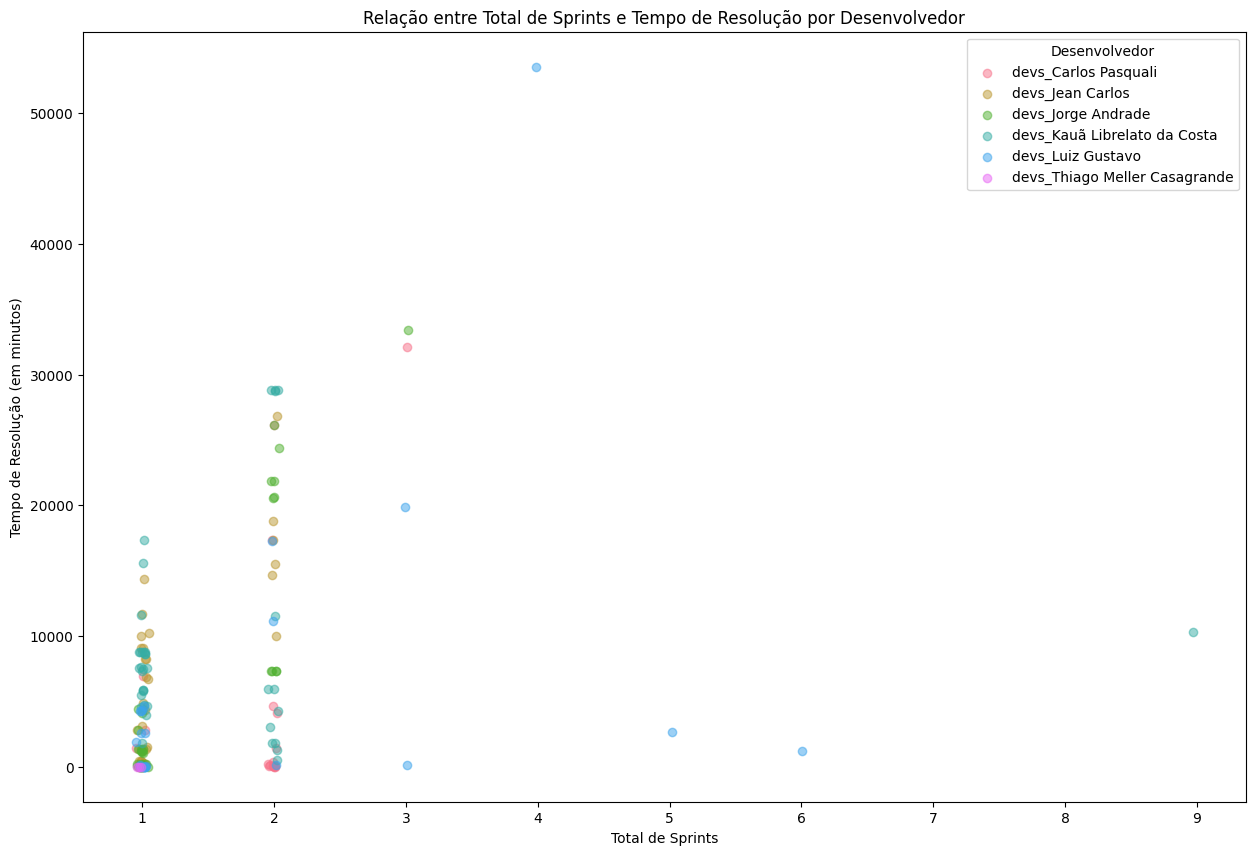

In [4]:
# Exemplo: lidar com valores ausentes
dadosLimpos.fillna(0, inplace=True)

# Passo 4: Visualizar os dados para cada desenvolvedor
dev_columns = [col for col in dadosLimpos.columns if col.startswith('devs_')]

# Criar uma paleta de cores para os desenvolvedores usando 'husl'
palette = sns.color_palette("husl", len(dev_columns))

plt.figure(figsize=(15, 10))

# Normalizar os valores de tempo_resolucao para minutos
dadosLimpos['tempo_resolucao'] = dadosLimpos['tempo_resolucao'] / 60

for i, dev_column in enumerate(dev_columns):
    # Adicionar um deslocamento aleatório aos valores de tempo_resolucao
    jitter_x = 0.02 * np.random.randn(len(dadosLimpos[dadosLimpos[dev_column] == 1]))
    jitter_y = 0.02 * np.random.randn(len(dadosLimpos[dadosLimpos[dev_column] == 1]))
    
    plt.scatter(dadosLimpos[dadosLimpos[dev_column] == 1]['total_sprints'] + jitter_x,
                dadosLimpos[dadosLimpos[dev_column] == 1]['tempo_resolucao'] + jitter_y,
                color=palette[i], alpha=0.5, label=dev_column)

plt.title('Relação entre Total de Sprints e Tempo de Resolução por Desenvolvedor')
plt.xlabel('Total de Sprints')
plt.ylabel('Tempo de Resolução (em minutos)')

plt.legend(title='Desenvolvedor')
plt.savefig('../Imagens/relacao_sprints_tempo.jpg')
plt.show()